 **MOUNTING ON GOOGLE DRIVE**
![Screenshot 2024-02-24 174719.png](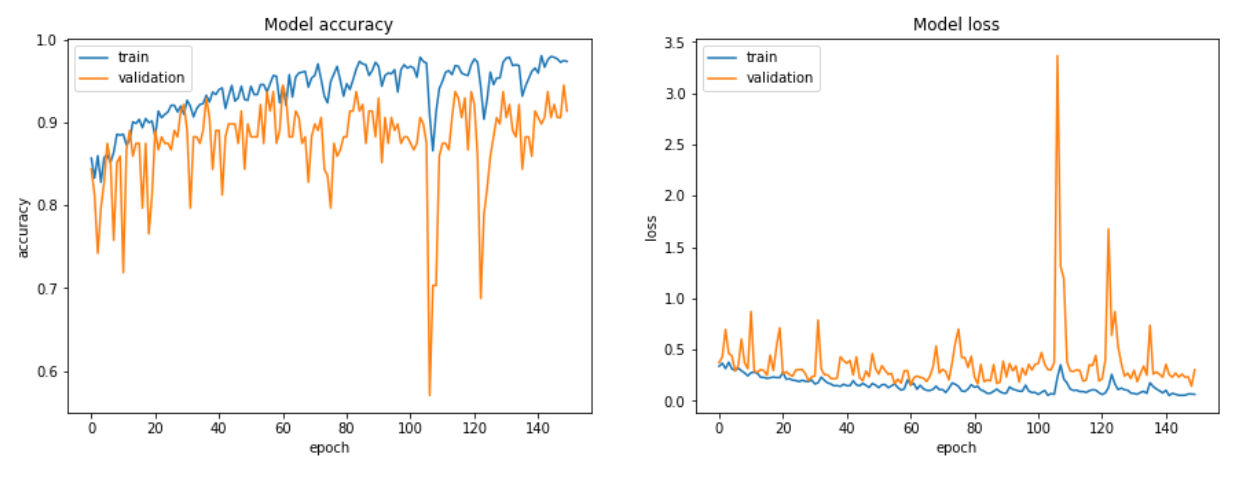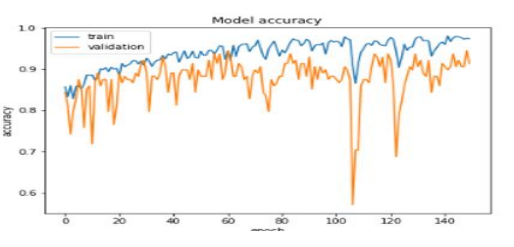)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.flush_and_unmount()

**Importing necessary libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from tensorflow import keras
import seaborn as sns
import random
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

**1.Data collection & exploration**

The datasets used in the project were discovered and collected using the information from an open source eye disease database.Three datasets (Drishti Rim-One and Acrima datasets) had fundus photographies which consists both glaucoma & normal eye tested images.

In [ ]:
current_dir = os.getcwd()
print(current_dir)

/content


**1.1 DRISTHI**

The dataset comprises of 101 retinal fundus images with 31 normal images and 70 glaucomatous images acquired using a retinal fundus camera. The ground truth for comparison of implemented approaches comprises of the ‘normal/abnormal’ labels and soft segmented maps of ‘disc/cup’ generated by the researchers of the IIIT Hyderabad in alliance with Aravind eye hospital in Madurai, India. It also includes a .txt file for each retinal image comprising of CDR values, which is a significant diagnostic parameter for glaucoma. Further, the images in the data repository are gathered from people of varying age groups visiting the hospital, with images acquired under varying brightness and contrast. Link to dataset: (https://cvit.iiit.ac.in/projects/mip/drishti-gs/mip-dataset2/Home.php)

In [ ]:
dristhi_dir = '/content/drive/MyDrive/datasets/dristi'
train_glaucoma_dir = '/content/drive/MyDrive/datasets/dristi/TrainingA/Training/Images/GLAUCOMA'
train_normal_dir = '/content/drive/MyDrive/datasets/dristi/TrainingA/Training/Images/NORMAL'
test_glaucoma_dir = '/content/drive/MyDrive/datasets/dristi/TestA/Test/Images/glaucoma'
test_normal_dir ='/content/drive/MyDrive/datasets/dristi/TestA/Test/Images/normal'
dristhi_glaucoma_images = os.listdir(train_glaucoma_dir)+os.listdir(test_glaucoma_dir)
dristhi_normal_images = os.listdir(train_normal_dir)+os.listdir(test_normal_dir)
# Look at the number of samples in each dataset
print("Dristhi dataset contains :")
print(f"\t{len(dristhi_glaucoma_images)} images representing an eye with glaucoma")
print(f"\t{len(dristhi_normal_images)} images representing a normal eye")

Dristhi dataset contains :
	70 images representing an eye with glaucoma
	31 images representing a normal eye


Sample Dristhi glaucoma images:


<ipython-input-7-567d2ce37237>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


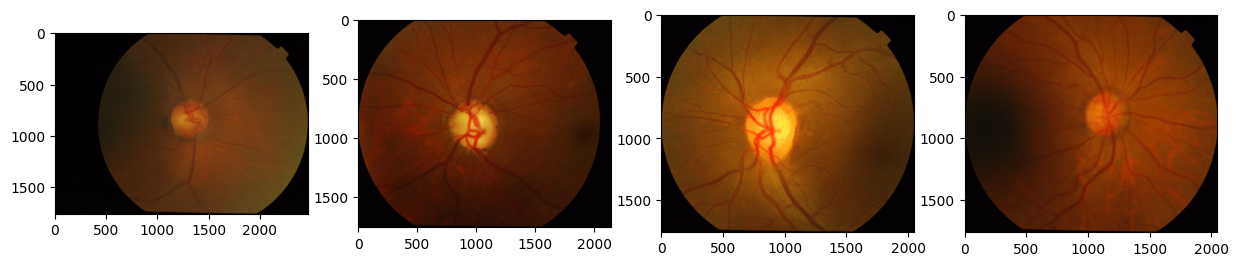


Sample Dristhi normal images:


<ipython-input-7-567d2ce37237>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


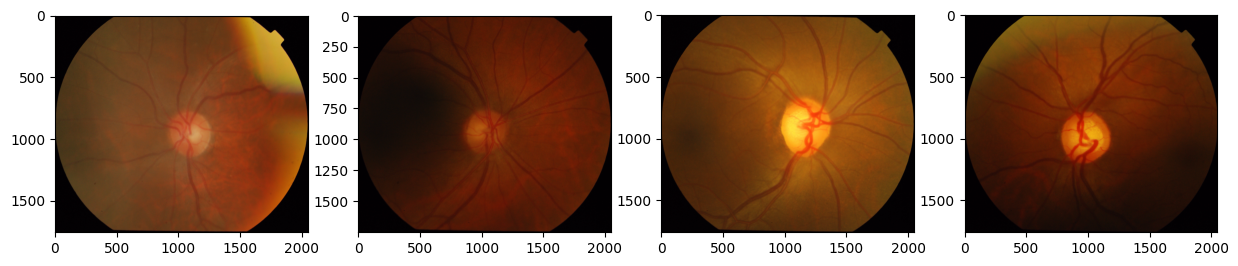

In [ ]:
print("Sample Dristhi glaucoma images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_glaucoma_dir, dristhi_glaucoma_images[i - 1])}"))
plt.show()

print("\nSample Dristhi normal images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_normal_dir, dristhi_normal_images[i - 1])}"))
plt.show()


**1.2 Rim-One**

The RIM-ONE DL image dataset consists of 313 retinographies from normal subjects and 172 retinographies from patients with glaucoma. These images were captured in three Spanish hospitals: Hospital Universitario de Canarias (HUC), in Tenerife, Hospital Universitario Miguel Servet (HUMS), in Zaragoza, and Hospital Clínico Universitario San Carlos (HCSC), in Madrid.

This dataset has been divided into training and test sets, with two variants:

Partitioned randomly: the training and test sets are built randomly from all the images of the dataset.

Partitioned by hospital: the images taken in the HUC are used for the training set, while the images taken in the HUMS and HCSC are used for testing.

In [ ]:

rimOne_dir = '/content/drive/MyDrive/datasets/rim-one/RIM-ONE_DL_images/partitioned_randomly'
train_glaucoma_dir = '/content/drive/MyDrive/datasets/rim-one/RIM-ONE_DL_images/partitioned_randomly/training_set/glaucoma'
train_normal_dir = '/content/drive/MyDrive/datasets/rim-one/RIM-ONE_DL_images/partitioned_randomly/training_set/normal'
test_glaucoma_dir = '/content/drive/MyDrive/datasets/rim-one/RIM-ONE_DL_images/partitioned_randomly/test_set/glaucoma'
test_normal_dir = '/content/drive/MyDrive/datasets/rim-one/RIM-ONE_DL_images/partitioned_randomly/test_set/normal'
rimOne_glaucoma_images = os.listdir(train_glaucoma_dir)+os.listdir(test_glaucoma_dir)
rimOne_normal_images = os.listdir(train_normal_dir)+os.listdir(test_normal_dir)

# Look at the number of samples in each dataset
print("Rim One dataset contains :")
print(f"\t{len(rimOne_glaucoma_images)} images representing an eye with glaucoma")
print(f"\t{len(rimOne_normal_images)} images representing a normal eye")

Rim One dataset contains :
	172 images representing an eye with glaucoma
	313 images representing a normal eye


Sample Rim-One glaucoma images:


<ipython-input-9-5215e82255ff>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


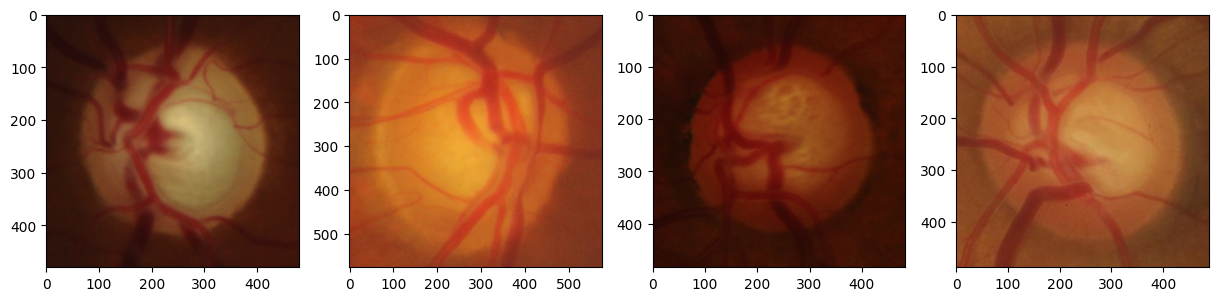


Sample Rim-One normal images:


<ipython-input-9-5215e82255ff>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


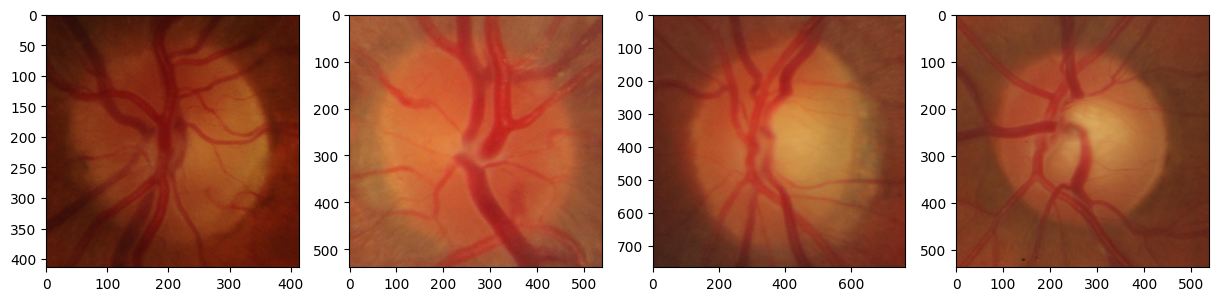

In [ ]:
print("Sample Rim-One glaucoma images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_glaucoma_dir, rimOne_glaucoma_images[i - 1])}"))
plt.show()

print("\nSample Rim-One normal images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_normal_dir, rimOne_normal_images[i - 1])}"))
plt.show()

**1.3. ACRIMA dataset**

Country: Spain

No. of patients: unknown

No. of images: 705

Diseases present: Glaucoma and healthy eyes

Instrument used: TRC retina camera (Topcon, Japan)

Image format: JPEG

ACRIMA database is composed by 705 fundus images (396 glaucomatous and 309 normal images). They were collected at the FISABIO Oftalmología Médica in Valencia, Spain, from glaucomatous and normal patients with their previous consent and in accordance with the ethical standards laid down in the 1964 Declaration of Helsinki. All images from ACRIMA database were annotated by glaucoma experts with several years of experience. They were cropped around the optic disc and renamed.

The image name has the following structure: First, the name starts with the two letters "Im", followed by an image number composed by three digits (starting from 001 until 705), followed by the label (this label is "g" if the image is pathological and "_" if the image is normal). Finally, all image names have the database name, "ACRIMA", at the end of their names. For example, a name for a glaucomatous image is "Im686_g_ACRIMA" and "Im001_ACRIMA" for a normal image.

In [ ]:
acrima_dir = '/content/drive/MyDrive/datasets/ACRIMAA/database'
glaucoma_dir = '/content/drive/MyDrive/datasets/ACRIMAA/database/Glaucoma'
normal_dir = '/content/drive/MyDrive/datasets/ACRIMAA/database/Normal'

normal_images = os.listdir(normal_dir)
glaucoma_images = os.listdir(glaucoma_dir)

# Look at the number of samples in each dataset
print("Acrima dataset contains : ")
print(f"\t{len(glaucoma_images)} images representing an eye with glaucoma")
print(f"\t{len(normal_images)} images representing a normal eye")

Acrima dataset contains : 
	396 images representing an eye with glaucoma
	309 images representing a normal eye


Sample glaucoma images:


<ipython-input-11-ea888e79ac72>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


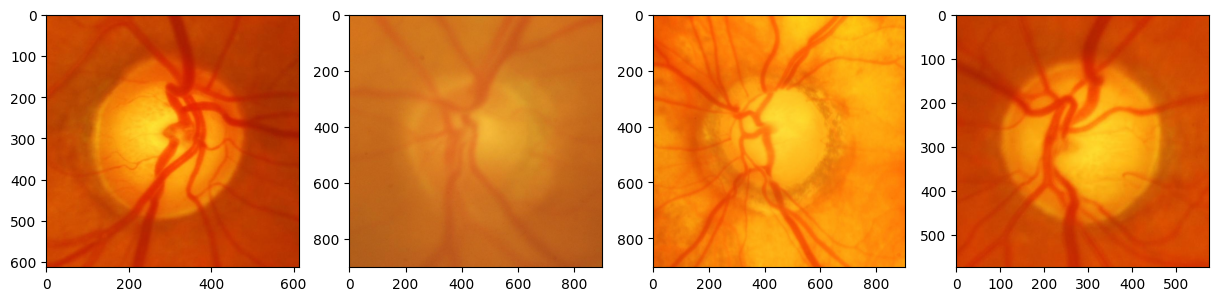


Sample normal images:


<ipython-input-11-ea888e79ac72>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


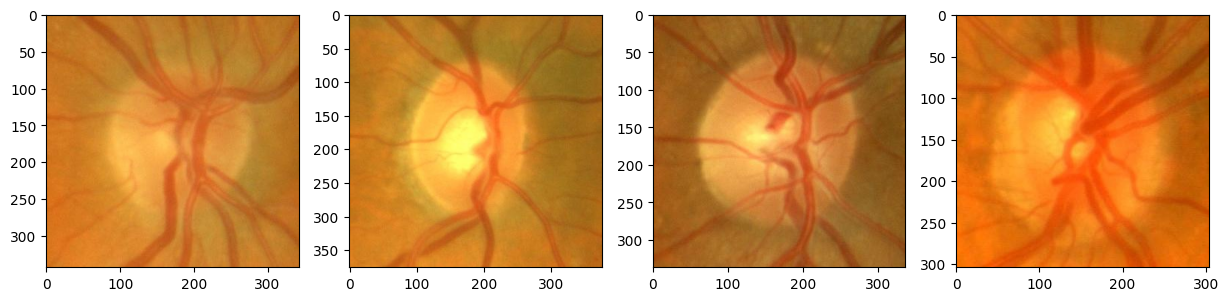

In [ ]:
print("Sample glaucoma images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(glaucoma_dir, glaucoma_images[i - 1])}"))
plt.show()

print("\nSample normal images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(normal_dir, normal_images[i - 1])}"))
plt.show()

**Combining Datasets**

In [ ]:
import os
import shutil

# Create destination directories
g_dest = '/content/drive/MyDrive/datasets/combine/glaucoma'
n_dest = '/content/drive/MyDrive/datasets/combine/normal'
os.makedirs(g_dest, exist_ok=True)
os.makedirs(n_dest, exist_ok=True)

# Define source paths for glaucoma
g_paths = ['/content/drive/MyDrive/datasets/ACRIMAA/database/Glaucoma',
           '/content/drive/MyDrive/datasets/rim-one/RIM-ONE_DL_images/partitioned_randomly/training_set/glaucoma',
           '/content/drive/MyDrive/datasets/rim-one/RIM-ONE_DL_images/partitioned_randomly/test_set/glaucoma',
           '/content/drive/MyDrive/datasets/dristi/TrainingA/Training/Images/GLAUCOMA',
           '/content/drive/MyDrive/datasets/dristi/TestA/Test/Images/glaucoma']

# Copy contents of each source directory to gl_dest
for path in g_paths:
    for root, dirs, files in os.walk(path):
        for file in files:
            shutil.copy(os.path.join(root, file), g_dest)

# Define source paths for normal
n_paths = ['/content/drive/MyDrive/datasets/ACRIMAA/database/Normal',
           '/content/drive/MyDrive/datasets/rim-one/RIM-ONE_DL_images/partitioned_randomly/training_set/normal',
           '/content/drive/MyDrive/datasets/rim-one/RIM-ONE_DL_images/partitioned_randomly/test_set/normal',
           '/content/drive/MyDrive/datasets/dristi/TrainingA/Training/Images/NORMAL',
           '/content/drive/MyDrive/datasets/dristi/TestA/Test/Images/normal']

# Copy contents of each source directory to n_dest
for path in n_paths:
    for root, dirs, files in os.walk(path):
        for file in files:
            shutil.copy(os.path.join(root, file), n_dest)

# Print the number of files copied
print("Number of files copied for glaucoma:", len(os.listdir(g_dest)))
print("Number of files copied for normal:", len(os.listdir(n_dest)))

Number of files copied for glaucoma: 638
Number of files copied for normal: 653


**Combined**

Total images: 1289
Total number of classes: 2
Total glaucoma images: 638
Total normal images: 653


<ipython-input-12-93579da7f5d7>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_classes, y=data_count, palette=colors)


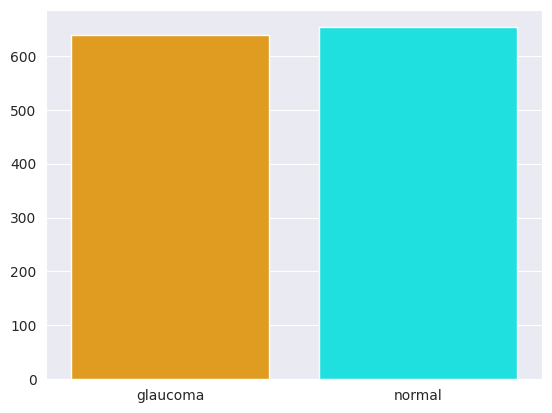

In [ ]:
import os
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt

base_dir = '/content/drive/MyDrive/datasets/combine'
base_dir = pathlib.Path(base_dir)

glaucoma = [fn for fn in os.listdir(f'/content/drive/MyDrive/datasets/combine/glaucoma')]
normal = [fn for fn in os.listdir(f'/content/drive/MyDrive/datasets/combine/normal')]
data = [glaucoma, normal]
dataset_classes = ['glaucoma', 'normal']

image_count = len(list(base_dir.glob('*/*.jpg'))) + len(list(base_dir.glob('*/*.png')))
print(f'Total images: {image_count}')
print(f'Total number of classes: {len(dataset_classes)}')
count = 0
data_count = []
for x in dataset_classes:
    print(f'Total {x} images: {len(data[count])}')
    data_count.append(len(data[count]))
    count += 1

sns.set_style('darkgrid')

# Define custom colors for each class
colors = ['orange', 'cyan']

sns.barplot(x=dataset_classes, y=data_count, palette=colors)
plt.show()

In [ ]:
!pip install split-folders

**Splitting Ratio of Dataset 80:10:10 (Train:Test:Validation)**

In [ ]:
import splitfolders #to split dataset
import pathlib
base_ds = '/content/drive/MyDrive/datasets/combine'
base_ds = pathlib.Path(base_ds)
img_height=256
img_width=256
batch_size=32
splitfolders.ratio(base_ds, output='images', seed=1321, ratio=(.80,.10,.10), group_prefix=None)

Copying files: 1291 files [00:56, 23.05 files/s] 


**Data Augmentation**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=45,  # Rotate images by a maximum of 45 degrees
    width_shift_range=0.2,  # Shift width by a maximum of 20%
    height_shift_range=0.2,  # Shift height by a maximum of 20%
    horizontal_flip=True,
    vertical_flip=True,  # Flip images vertically
    brightness_range=[0.5, 1.5]  # Adjust brightness
)

# Apply data augmentation to the training set
train_ds = train_datagen.flow_from_directory(
    'images/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True  # Shuffle the data
)

# For validation and testing, you typically don't want to perform data augmentation
# So, create separate instances of ImageDataGenerator without augmentation
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators for validation and testing
val_ds = val_datagen.flow_from_directory(
    'images/val',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_ds = test_datagen.flow_from_directory(
    'images/test',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1032 images belonging to 2 classes.
Found 128 images belonging to 2 classes.
Found 131 images belonging to 2 classes.


**CNN MODEL**

In [39]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

# Initialize the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3), activation='relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a third convolutional layer
classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a fourth convolutional layer
classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units=512, activation='relu'))
classifier.add(Dropout(0.5)) # Adding dropout
classifier.add(Dense(units=256, activation='relu'))
classifier.add(BatchNormalization()) # Adding batch normalization
classifier.add(Dense(units=2, activation='softmax'))

# Compiling the CNN
classifier.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
classifier.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model
history = classifier.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=150,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping, reduce_lr]
)

**SAVING CNN MODEL IN .h5 format**

In [ ]:
classifier.save('/content/drive/MyDrive/datasets/combine_model/combinee_cnn.h5')


**LOADING CNN MODEL**

In [ ]:
from tensorflow.keras.models import load_model

# Load the model from the specified path
model = load_model('/content/drive/MyDrive/datasets/combine_model/combinee_cnn.h5')

# Confirm that the model has been loaded successfully
print("Glaucoma detection model loaded")


Glaucoma detection model loaded


In [ ]:
from keras.preprocessing.image import img_to_array

def glaucoma_prediction(test_image):
    image = img_to_array(test_image)
    image = np.expand_dims(image, axis=0)
    result = np.argmax(model.predict(image))
    return result

In [ ]:
from keras.preprocessing.image import load_img

# Load the image from the specified path and resize it to the target size
test_image = load_img('/content/drive/MyDrive/datasets/ACRIMAA/database/Glaucoma/Im321_g_ACRIMA.jpg', target_size=(256, 256))

# Now you can use the loaded image for prediction or any other tasks
prediction = glaucoma_prediction(test_image)
if prediction == 0:
    print("Glaucoma")
else:
    print("Non-Glaucoma")


1/1 [==============================] - 0s 277ms/step
Glaucoma


In [ ]:
from keras.preprocessing.image import load_img

# Load the image from the specified path and resize it to the target size
test_image = load_img('/content/drive/MyDrive/datasets/dristi/TestA/Test/Images/normal/drishtiGS_007.png', target_size=(256, 256))

# Now you can use the loaded image for prediction or any other tasks
prediction = glaucoma_prediction(test_image)
if prediction == 0:
    print("Glaucoma")
else:
    print("Non-Glaucoma")

1/1 [==============================] - 0s 61ms/step
Non-Glaucoma


**CNN Model Accuracy**

In [ ]:
score=model.evaluate(test_ds)
print("Loss:",score[0],"Accuracy:",score[1])

5/5 [==============================] - 5s 790ms/step - loss: 0.0632 - accuracy: 0.9618
Loss: 0.06319119036197662 Accuracy: 0.9618320465087891


**Testing set confusion matrix for CNN MODEL**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sb

pred= np.round(model.predict(test_ds, verbose=1))
test_labels=test_ds.labels
test_pred_labels=[]
for i in range(len(pred)):
  test_pred_labels.append(np.argmax(pred[i]))
conf_matrix= confusion_matrix(test_pred_labels,test_labels)
print (conf_matrix)

5/5 [==============================] - 4s 798ms/step
[[62  2]
 [ 3 64]]


**HEATMAP**

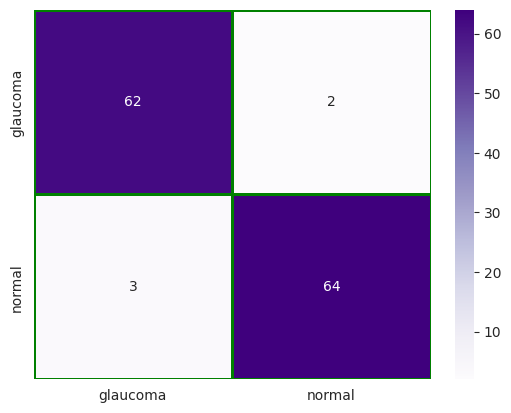

In [ ]:
sb.heatmap(conf_matrix,cmap='Purples', annot=True,xticklabels=['glaucoma','normal'],yticklabels=['glaucoma','normal'],linewidths=1,
                linecolor='green').plot()
plt.show()

In [ ]:
import pandas as pd

test_report = classification_report(test_ds.labels,test_pred_labels, target_names=['glaucoma','normal'], output_dict=True)
test_df = pd.DataFrame(test_report).transpose()
test_df

precision    recall  f1-score     support
glaucoma       0.968750  0.953846  0.961240   65.000000
normal         0.955224  0.969697  0.962406   66.000000
accuracy       0.961832  0.961832  0.961832    0.961832
macro avg      0.961987  0.961772  0.961823  131.000000
weighted avg   0.961935  0.961832  0.961828  131.000000

**SENSITIVITY & SPECIFICITY OF CNN MODEL**

In [34]:
from sklearn.metrics import classification_report

# Assuming you have already obtained the classification report
test_report = classification_report(test_ds.labels, test_pred_labels, target_names=['glaucoma', 'normal'], output_dict=True)

# Extract sensitivity (recall for the positive class) and specificity (recall for the negative class)
sensitivity = test_report['glaucoma']['recall']
specificity = test_report['normal']['recall']

print("Sensitivity (Recall for glaucoma):", sensitivity)
print("Specificity (Recall for normal):", specificity)


Sensitivity (Recall for glaucoma): 0.9538461538461539
Specificity (Recall for normal): 0.9696969696969697


**DENSENET-121 MODEL**

In [25]:
from keras.applications import DenseNet121
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

# Load DenseNet121 pre-trained model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze first few layers
for layer in base_model.layers[:100]:
    layer.trainable = False

# Add custom layers on top of DenseNet121
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

# Combine base model and custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
model_checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)

# Train the model
history = model.fit(
    train_ds,
    steps_per_epoch=len(train_ds),
    epochs=40,
    validation_data=val_ds,
    validation_steps=len(val_ds),
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)

29084464/29084464 [==============================] - 0s 0us/step


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 262, 262, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 128, 128, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1/conv[0][0]']      

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


33/33 [==============================] - 602s 17s/step - loss: 0.7978 - accuracy: 0.7190 - val_loss: 0.5940 - val_accuracy: 0.7188 - lr: 0.0010
Epoch 2/40
33/33 [==============================] - 535s 16s/step - loss: 0.5191 - accuracy: 0.8149 - val_loss: 0.4703 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 3/40
33/33 [==============================] - 533s 16s/step - loss: 0.4445 - accuracy: 0.8256 - val_loss: 1.8424 - val_accuracy: 0.5703 - lr: 0.0010
Epoch 4/40
33/33 [==============================] - 539s 16s/step - loss: 0.3143 - accuracy: 0.8595 - val_loss: 0.3938 - val_accuracy: 0.9062 - lr: 0.0010
Epoch 5/40
33/33 [==============================] - 538s 16s/step - loss: 0.3283 - accuracy: 0.8605 - val_loss: 0.4698 - val_accuracy: 0.8203 - lr: 0.0010
Epoch 6/40
33/33 [==============================] - 535s 16s/step - loss: 0.3511 - accuracy: 0.8585 - val_loss: 0.3403 - val_accuracy: 0.9141 - lr: 0.0010
Epoch 7/40
33/33 [==============================] - 536s 16s/step - loss: 0.3296 

**PLOTTING ACCURACY & LOSS GRAPHS**

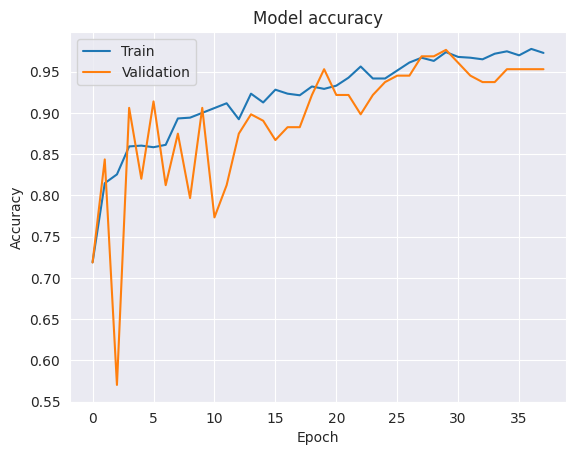

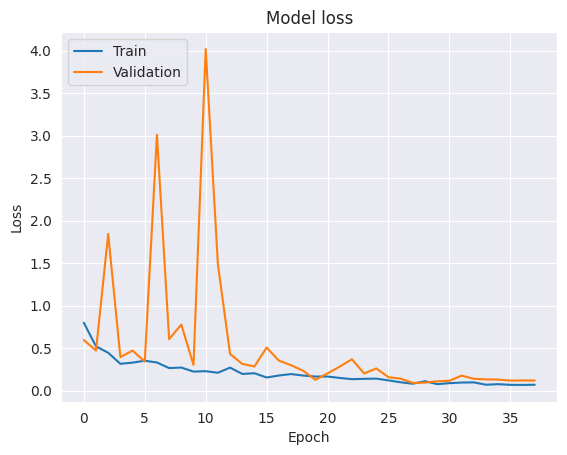

In [26]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


**LOADING DENSE-NET121 MODEL**

In [29]:
from tensorflow.keras.models import load_model

# Load the model from the specified path
model1 = load_model('/content/best_model.h5')

# Confirm that the model has been loaded successfully
print("Glaucoma detection model loaded")


Glaucoma detection model loaded


In [31]:
from keras.preprocessing.image import img_to_array

def glaucoma_prediction(test_image):
    image = img_to_array(test_image)
    image = np.expand_dims(image, axis=0)
    result = np.argmax(model1.predict(image))
    return result

In [32]:
from keras.preprocessing.image import load_img

# Load the image from the specified path and resize it to the target size
test_image = load_img('/content/drive/MyDrive/datasets/ACRIMAA/database/Glaucoma/Im321_g_ACRIMA.jpg', target_size=(256, 256))

# Now you can use the loaded image for prediction or any other tasks
prediction = glaucoma_prediction(test_image)
if prediction == 0:
    print("Glaucoma")
else:
    print("Non-Glaucoma")

1/1 [==============================] - 3s 3s/step
Glaucoma


**DENSENET-121 MODEL ACCURACY**

In [33]:
scoree=model1.evaluate(test_ds)
print("Loss:",score[0],"Accuracy:",scoree[1])

5/5 [==============================] - 39s 5s/step - loss: 0.1142 - accuracy: 0.9542
Loss: 0.06319119036197662 Accuracy: 0.9541984796524048


**TESTING SET CONFUSION MATRIX FOR DENSENET-121 MODEL**

In [36]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sb

pred= np.round(model1.predict(test_ds, verbose=1))
test_labels=test_ds.labels
test_pred_labels=[]
for i in range(len(pred)):
  test_pred_labels.append(np.argmax(pred[i]))
conf_matrix= confusion_matrix(test_pred_labels,test_labels)
print (conf_matrix)

5/5 [==============================] - 32s 5s/step
[[61  2]
 [ 4 64]]


**HEATMAP**

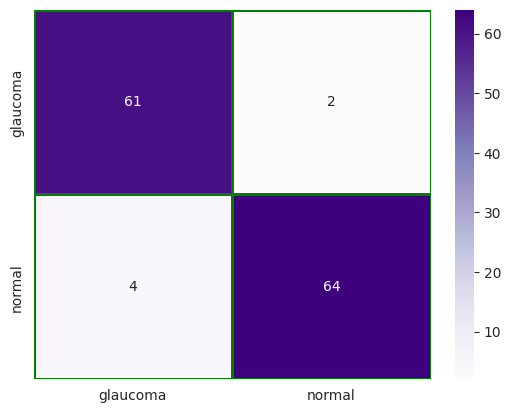

In [37]:
sb.heatmap(conf_matrix,cmap='Purples', annot=True,xticklabels=['glaucoma','normal'],yticklabels=['glaucoma','normal'],linewidths=1,
                linecolor='green').plot()
plt.show()

In [38]:
import pandas as pd

test_report = classification_report(test_ds.labels,test_pred_labels, target_names=['glaucoma','normal'], output_dict=True)
test_df = pd.DataFrame(test_report).transpose()
test_df

precision    recall  f1-score     support
glaucoma       0.968254  0.938462  0.953125   65.000000
normal         0.941176  0.969697  0.955224   66.000000
accuracy       0.954198  0.954198  0.954198    0.954198
macro avg      0.954715  0.954079  0.954174  131.000000
weighted avg   0.954612  0.954198  0.954182  131.000000

**SENSITIVITY & SPECIFICITY OF DENSENET-121 MODEL**

In [40]:
from sklearn.metrics import classification_report

# Assuming you have already obtained the classification report
test_report = classification_report(test_ds.labels, test_pred_labels, target_names=['glaucoma', 'normal'], output_dict=True)

# Extract sensitivity (recall for the positive class) and specificity (recall for the negative class)
sensitivity = test_report['glaucoma']['recall']
specificity = test_report['normal']['recall']

print("Sensitivity (Recall for glaucoma):", sensitivity)
print("Specificity (Recall for normal):", specificity)


Sensitivity (Recall for glaucoma): 0.9384615384615385
Specificity (Recall for normal): 0.9696969696969697
